In [8]:
from Bio.PDB import PDBParser
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os


In [9]:
def calculate_distance(pdb_file, chain_id, res1, res2):
    """Calculate distance between two residues in a protein structure."""
    parser = PDBParser()
    structure = parser.get_structure("Protein", pdb_file)
    atom1 = structure[0][chain_id][res1]['CA']  # Alpha Carbon atom
    atom2 = structure[0][chain_id][res2]['CA']
    return atom1 - atom2


In [19]:
def visualize_protein_structure(pdb_file, residues_to_highlight,output_file):
    """
    Visualize a protein structure using Matplotlib and highlight specific residues.
    :param pdb_file: Path to the PDB file.
    :param residues_to_highlight: List of residue numbers to highlight.
    :param output_dir: Directory to save the visualization image.
    """
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("Protein", pdb_file)
    chain = list(structure[0].get_chains())[0]  # Use the first chain by default

    # Extract coordinates for all alpha carbons
    all_coords = []
    highlight_coords = []
    for residue in chain:
        if 'CA' in residue:
            coord = residue['CA'].get_coord()
            all_coords.append(coord)
            if residue.id[1] in residues_to_highlight:  # Match residue number
                highlight_coords.append(coord)

    all_coords = list(zip(*all_coords))  # Transpose for easier plotting
    highlight_coords = list(zip(*highlight_coords))  # Transpose

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(all_coords[0], all_coords[1], all_coords[2], label="Protein Backbone", color="cyan")
    if highlight_coords:
        ax.scatter(highlight_coords[0], highlight_coords[1], highlight_coords[2],
                   color="yellow", s=50, label="Highlighted Residues")

    ax.set_title(f"Protein Structure: {os.path.basename(pdb_file)}")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.legend()
    
    plt.savefig(output_file)
    plt.close()  # Close the plot to free memory
    print(f"Visualization saved as {output_file}")

In [11]:
def analyze_protein(file_path, chain_id, residues_of_interest):
    """Perform basic analysis on a protein structure."""
    print(f"Analyzing protein structure: {file_path}")
    distances = []
    for i in range(len(residues_of_interest) - 1):
        distance = calculate_distance(file_path, chain_id, residues_of_interest[i], residues_of_interest[i+1])
        distances.append(distance)
        print(f"Distance between residue {residues_of_interest[i]} and {residues_of_interest[i+1]}: {distance:.2f} Å")
    return distances

In [12]:
def visualize_distances(distances, residues):
    """Visualize distances between residues as a bar chart."""
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(distances)), distances, color='orange')
    plt.xticks(range(len(distances)), [f"{residues[i]}-{residues[i+1]}" for i in range(len(distances))], rotation=45)
    plt.ylabel("Distance (Å)")
    plt.xlabel("Residue Pairs")
    plt.title("Distances Between Residues")
    plt.tight_layout()
    plt.show()

Analyzing protein structure: ..\data\protein_models\1iwg.pdb
Distance between residue 200 and 205: 8.46 Å
Distance between residue 205 and 210: 8.77 Å
Distance between residue 210 and 215: 14.61 Å


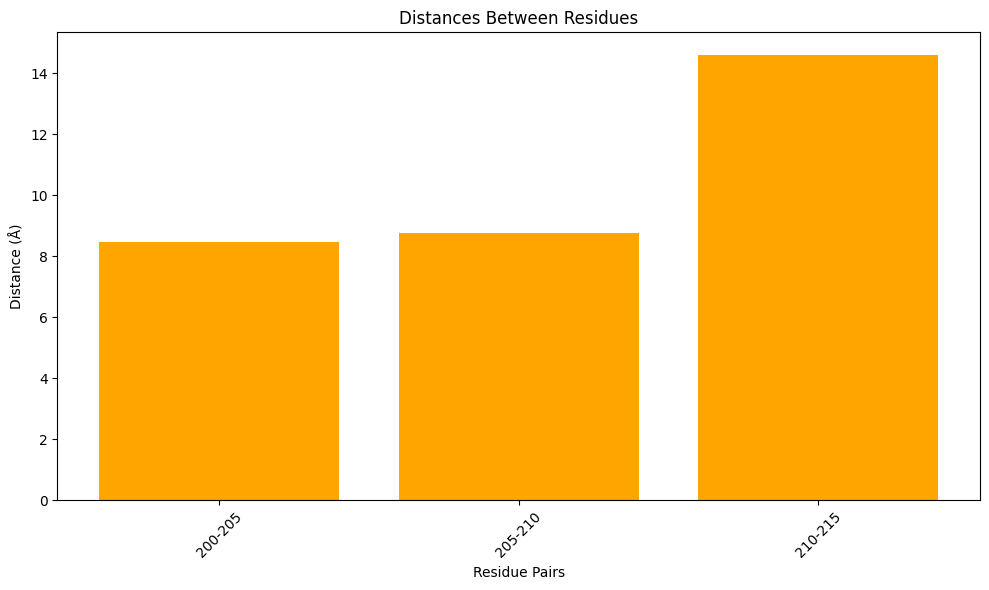

Visualization saved as ../data/processed_results/1iwg_protein_visualization.png
Analysis and visualization complete.


In [21]:
pdb_file = r"..\data\protein_models\1iwg.pdb"
chain_id = "A"
residues_of_interest = [200, 205, 210, 215]
output_file = "../data/processed_results/1iwg_protein_visualization.png"
# Perform analysis
distances = analyze_protein(pdb_file, chain_id, residues_of_interest)
# Visualize distances
visualize_distances(distances, residues_of_interest)
# Visualize in PyMOL
visualize_protein_structure(pdb_file, residues_of_interest,output_file)
print("Analysis and visualization complete.")

Analyzing protein structure: ..\data\protein_models\1iwg.pdb
Distance between residue 200 and 205: 8.46 Å
Distance between residue 205 and 210: 8.77 Å
Distance between residue 210 and 215: 14.61 Å


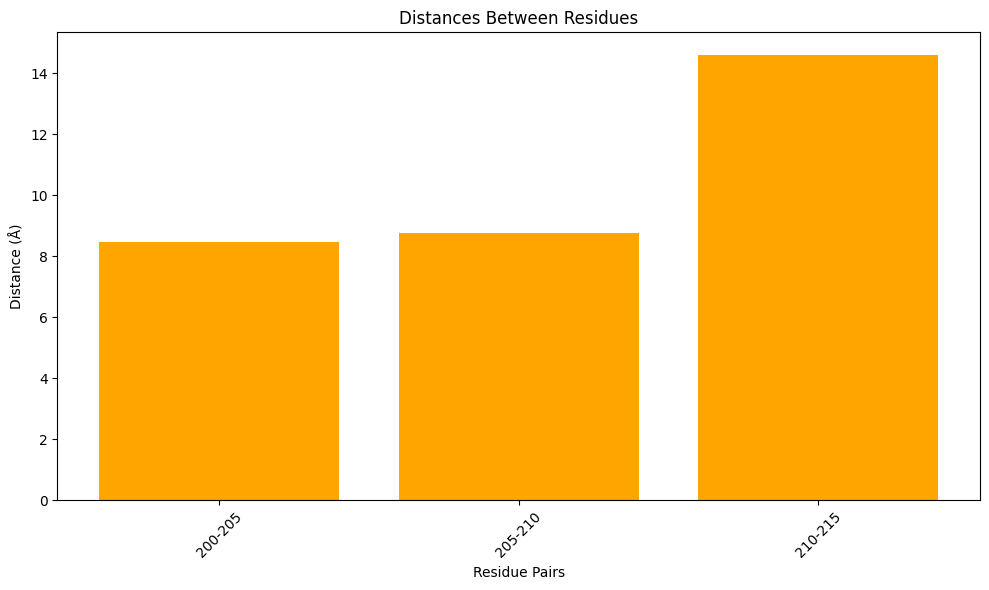

Visualization saved as ../data/processed_results/0_visualization.png
Analyzing protein structure: ..\data\protein_models\2xyz.pdb


FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\protein_models\\2xyz.pdb'

In [23]:
pdb_files = [
    r"..\data\protein_models\1iwg.pdb",
    r"..\data\protein_models\2xyz.pdb",
    r"..\data\protein_models\3abc.pdb",
    r"..\data\protein_models\4def.pdb",
    r"..\data\protein_models\5ghi.pdb",
    r"..\data\protein_models\6jkl.pdb"
]  # Update with paths to your PDB
chain_id = "A"
n=0
# Perform analysis
for pdb_file in pdb_files:
        # Perform analysis
        residues_of_interest = [200, 205, 210, 215]
        distances = analyze_protein(pdb_file, chain_id, residues_of_interest)
        visualize_distances(distances, residues_of_interest)
        # Save protein structure visualization
        structure_output_file = f"../data/processed_results/{n}_visualization.png"
        visualize_protein_structure(pdb_file, residues_of_interest, structure_output_file)
        n+=1


print("Analysis and visualization complete.")